<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 6</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.


<div style="text-align: center;">
    <h3><strong>Imports and built-in functions</strong></h3>
</div>

In [1]:
import numpy as np
#Import in-built functions for different integration techniques
#For reference: https://docs.scipy.org/doc/scipy/reference/integrate.html
from scipy.integrate import quad, fixed_quad, romberg, dblquad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

<div style="text-align: center;">
    <h2><strong> Monte Carlo Method v.s. Deterministic Quadrature </strong></h2>
</div>

In this problem, you will be looking at the difference between various deterministic and non-deterministic methods. Let's consider an ellipsoid parametrized by,
$$ \frac{{x^2+y^2} }{\beta^2}+\frac{z^2}{c^2}=1 $$
where $-1\leq x \leq 1$ and $-1\leq y \leq 1$. Let's consider the surface element, 
$$ A=  \int_{\partial V} 1 dA $$



## A) 
Write down the explicit integration formula in LaTeX for surface area. Remember to express the integration boundaries, 

* This variable will be z!
* This is a special case of the ellipsoid
* Viewed along the z-axis, it's a circle
* What is the radius at each z-point?
-------------------------write your expression below-----------------------------------------

$$\frac{x^2 + y^2}{\beta^2} + \frac{z^2}{c^2} = 1$$

<center>Describe its surface area as integral of many circular strips of radius $\rho (z)$ and surface area of $2\pi \rho(z)dz = dA$</center>

<center>Its $\rho(z)$ will be:</center>

$$\frac{(\rho(z))^2}{\beta^2} + \frac{z^2}{c^2} = 1$$
<center>Isolate the $\rho(z)$...</center>

$$(\rho(z))^2 + \frac{\beta^2 z^2}{c^2} = \beta^2$$
$$(\rho(z))^2 = \beta^2 - \frac{\beta^2 z^2}{c^2}$$
$$\rho(z) = \sqrt{\beta^2 - \frac{\beta^2 z^2}{c^2}}$$
$$\rho(z) = \beta\sqrt{1 - \frac{z^2}{c^2}}$$

$$A = 2\int_0^c dA$$
$$A = 2\int_0^c 2\pi \beta \sqrt{1 - \frac{z^2}{c^2}}dz$$
-----------------------------write your expression above-------------------------------------

hint: You should be able to express it using a single variable. 

## B) 
Use the above formula approximate the area by using **two** deterministic quadrature techniques: 1) the midpoint rule and 2) Gaussian quadrature (you can use **your code from previous problem set**.) Verify the calculated values with the formulas below, 
$$A=2\pi \beta^2\left(1+\frac{c}{a e} \mathrm{sin^{-1}}(e) \right), \hspace{0.2cm} e=1-\frac{\beta^2}{c^2}$$
 
You may realize that I did not provide the value of a and c. Plot the error as a heatmap with various $\beta,c$ values ranging from [0.001,1000]. Does the value of a and c has any influence on the error?


In [2]:
class Quad_:
    def __init__(self,fuc,N,a,b):
        '''The class Quad tkaes four inputs: 
         fuc: a function input,
         N: number of grid points,
         a,b: left and right points'''
        self.a = a
        self.b = b
        self.N = N
    
    def mid_quad(self, fuc):

        dx          = (self.b - self.a)/float(self.N)
        left_edges  = np.linspace(self.a, self.b-dx, self.N) # Be sure to stop the left-edge computation at b-dx
        x_midpoints = left_edges + (dx/2.0)
        f_midpoints = fuc(x_midpoints)
        dA_array    = f_midpoints * dx
        approx_I    = np.sum(dA_array)

        if False:
            print(f"a, b, N, dx: {self.a}, {self.b}, {self.N}, {dx}")
            print("left_edges:")
            display(left_edges)
            print("x_midpoints:")
            display(x_midpoints)
            print("f_midpoints:")
            display(f_midpoints)
            print("dA_array:")
            display(dA_array)
            print(f"approx_I: {approx_I}")
            print()

        return approx_I

In [3]:
class Gauss_Quad_(Quad_):
    def __init__(self, fuc, N, a, b, order):
        '''The class take an additional input, called order. 
        make sure you look into super(). '''
        super().__init__(fuc, N, a, b)
        self.order = order

    # Legendre polynomials P_0 - P_5, selected by self.order
    # These can be found here:
    # https://mathworld.wolfram.com/LegendrePolynomial.html  (Eq 2 - Eq 7)
    
    def legendre_poly(self, x):
        if self.order == 0:
            return 1
        elif self.order == 1:
            return x
        elif self.order == 2:
            return (3 * (x**2) - 1)/2.0
        elif self.order == 3:
            return (5 * (x**3) - 3 * x)/2.0
        elif self.order == 4:
            return (35 * (x**4) - 30 * (x**2) + 3)/8.0
        elif self.order == 5:
            return (63 * (x**5) - 70 * (x**3) + 15 * x)/8.0
  
        return 0

    
    # First derivatives of Legendre polynomials P_0 - P_5, selected by self.order
    
    def legendre_poly_prime(self, x):
        if self.order == 0:
            # P_0(x) = 1
            # P_0'(x) = 0
            return np.zeros(len(x))
        elif self.order == 1:
            # P_1(x) = x
            # P_1'(x) = 1
            return np.ones(len(x))
        elif self.order == 2:
            # P_2(x) = (3 * (x**2) - 1)/2.0
            # P_2'(x) = (1/2.0)*(3 * (2*x)) = 3*x
            return 3*x
        elif self.order == 3:
            # P_3(x) = (5 * (x**3) - 3 * x)/2.0
            # P_3'(x) = (1/2.0)*(5 * (3*x**2) - 3)
            return (15 * (x**2) - 3)/2.0
        elif self.order == 4:
            # P_4(x) = (35 * (x**4) - 30 * (x**2) + 3)/8.0
            # P_4'(x) = (1/8.0)*(35 * (4*x**3) - 30 * (2*x))
            return (140 * (x**3) - 60 * x)/8.0
        elif self.order == 5:
            # P_5(x) = (63 * (x**5) - 70 * (x**3) + 15 * x)/8.0
            # P_5'(x) = (1/8.0)*(63 * (5*x**4) - 70 * (3*x**2) + 15)
            return (315 * (x**4) - 210 * (x**2) + 15)/8.0
  
        return 0

    def newton_method_root(self):
        estimates = np.array([None]*(len(M_vals)+1))
        # Prepare estmates by eye using the graphs plotted
        e1 = [0.0]
        e2 = [-0.55, 0.55]
        e3 = [-0.77, 0.0, 0.77]
        e4 = [-0.89, -0.30, 0.29, 0.85]
        e5 = [-0.90, -0.55, 0.0, 0.55, 0.90]
        estimates[0] = None
        estimates[1] = e1
        estimates[2] = e2
        estimates[3] = e3
        estimates[4] = e4
        estimates[5] = e5

        # Declare arrays
        roots   = np.array([0.0]*self.order)
        weights = np.array([0.0]*self.order)
        f       = self.legendre_poly

        r = 0
        for est in estimates[self.order]:
            
            # First, find the root that lies in the interval [est, est+0.25]
            my_root = newton(f, est, x1=est+0.25)
            roots[r] = my_root  # Add to list            
            r += 1

        # Now find the "weights" of these roots.
        
        # We will use the expression given below for w_i(x)
        
        #     w_i = 2.0 / ((1.0 - x_i^2) * (P_M'(x_i))^2)
        
        
        # First, find the first derivative
        derivs  = self.legendre_poly_prime(roots)

        for i in range(self.order):
            weights[i] = 2.0 / ((1.0 - roots[i]**2) * (derivs[i]**2))

        return roots, weights

    def scipy_method_root(self):
        return roots_legendre(self.order)

    
    # Note: to support this new method, added self.a, self.b, etc. to the Quad_ class above.
    # See the parent class's __init()__ function
    
    def gauss_quad(self, func):

        coeff = (self.b - self.a) / 2.0

        # Go get the roots and weights for this P_M:
        roots, weights = self.newton_method_root()

        # Evaluate our function at those roots, but respect the change of variables
        # as described above
        u = coeff * roots + (self.b + self.a) / 2.0
        
        # func had better be vectorized so can just give it the np.array of roots...
        f_vals = func(u)

        # Compute the product of w_i and func(x_i)
        prod   = weights * f_vals

        # Compute the sum
        sum = np.sum(prod)

        # And the final answer:
        q_val = coeff * sum

        return q_val

In [4]:
def ellipsoid_strip(z, beta, c):
    front = 2 * 2 * np.pi * beta
    sqrt = np.sqrt(1 - (z**2)/(c**2))

    strip = front * sqrt

    return strip

In [5]:
#
# Test ellipsoid function
rho = ellipsoid_strip(0, 1, 1)
print(rho)
rho = ellipsoid_strip(0.5, 1, 1)
print(rho)
rho = ellipsoid_strip(0.95, 1, 1)
print(rho)


12.566370614359172
10.882796185405306
3.923847966690275


In [6]:
'''--------------------Write your code below this line------------------------------'''
c    = np.array([1e-3,1e-2,1e-1,1,1e1,1e2, 1e3])
#beta = np.array([1e-3,1e-2,1e-1,1,1e1,1e2, 1e3])
beta = c / 2.0

display(beta)
'''--------------------Write your code above this line------------------------------'''

array([5.e-04, 5.e-03, 5.e-02, 5.e-01, 5.e+00, 5.e+01, 5.e+02])

'--------------------Write your code above this line------------------------------'

In [19]:
def true_area(beta, c, a):
    front = 2 * np.pi * beta**2
    e = 1 - (beta**2)/(c**2)
#    print(f"beta: {beta}, c: {c}, e: {e}")
    ae = np.arcsin(e)
#    print(f"ae: {ae}")
    
    parens = (1 + (c * np.arcsin(e)/(a * e)))
    combo = front * parens

    return combo

true_area_vals = np.zeros((len(beta), len(c)))


# Calculate the true surface area for comparison.

# Some of the beta, c combinations yield unphysical results, which
# show up as nan.  Can ignore those for now, they will just show
# up as blank squares in our heatmap later.

for i in range(len(beta)):
    for j in range(len(c)):
        true_area_vals[i][j] = true_area(beta[i], c[j], 1.0) # Assume a=1.0

/var/folders/vd/c2f26vj11v7c6kpt7gg_3sz80000gn/T/ipykernel_42364/961831481.py:5: RuntimeWarning: invalid value encountered in arcsin
  ae = np.arcsin(e)
/var/folders/vd/c2f26vj11v7c6kpt7gg_3sz80000gn/T/ipykernel_42364/961831481.py:8: RuntimeWarning: invalid value encountered in arcsin
  parens = (1 + (c * np.arcsin(e)/(a * e)))


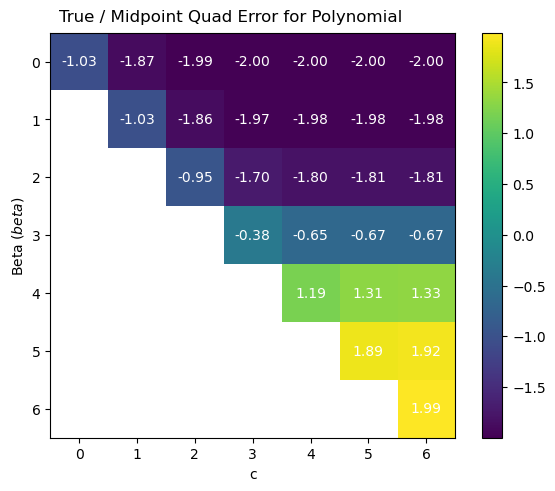

In [20]:
# midpoint

mid_quad_vals     = np.zeros((len(beta), len(c)))
mid_quad_errs     = np.zeros((len(beta), len(c)))

for i in range(len(beta)):
    for j in range(len(c)):
        myQ = Quad_(None, 100, 0, c[j])
        mid_quad_vals[i][j] = myQ.mid_quad(lambda z: ellipsoid_strip(z, beta[i], c[j]))

#print("mid_quad_vals")
#display(mid_quad_vals)
#print()

for i in range(len(beta)):
    for j in range(len(c)):
        numerator   = true_area_vals[i][j] - mid_quad_vals[i][j]
        denominator = true_area_vals[i][j] + mid_quad_vals[i][j]
        if denominator == 0:
            denominator = 1.0
        mid_quad_errs[i][j] = 2.0 * (numerator/denominator)

fig, hm_axs = plt.subplots(1, 1, layout='constrained')
fig.suptitle("True / Midpoint Quad Error for Polynomial")
er_im = hm_axs.imshow(mid_quad_errs, aspect='equal')
#hm_axs.set_yticks(np.arange(len(beta)), labels='$beta$')
hm_axs.set_ylabel("Beta ($beta$)")
hm_axs.set_xlabel("c")
for i in range(len(beta)):
    for j in range(len(c)):
        text = hm_axs.text(j, i, f"{mid_quad_errs[i][j]:0.02f}",
                           ha="center", va="center", color="w")
plt.colorbar(er_im)
plt.show()

## C) 
Let's first consider the surface with non-deterministic quadrature techniques (Monte Carlo). As discussed in class, the following simple Monte Carlo simulation can be used to approximate a 2d integral,
$$     \int_a^b f(x) dx =\lim_{N\to \infty} \frac{b-a}{N} \sum_{i=0}^N f(x_i), \hspace{0.2cm} X \sim U(a,b) $$
and we set $2\beta=c=1$. For each sampling size, N=[10,100,1000,10000,100000], calculate the error, and plot them. 



True area calculated: 3.3469733915391022
M_C_approx_vals ({len(N_vals)} values):


array([5.03737441, 4.99803434, 4.95152741, 4.92760489, 4.93135272])


M_C_err_vals ({len(N_vals)} values):


array([1.69040102, 1.65106095, 1.60455402, 1.5806315 , 1.58437933])

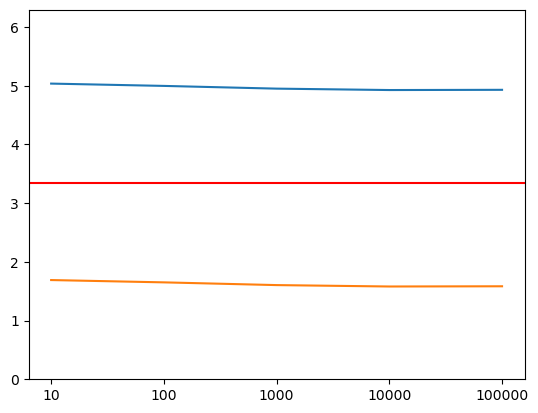

'--------------------Write your code above this line------------------------------'

In [21]:
'''--------------------Write your code below this line------------------------------'''
N_vals     = [10, 100, 1000, 10000, 100000]
tick_array = [0, 1, 2, 3, 4]

# Call these "my_beta" and "my_c" here because used beta and c as arrays above.
# Here they're just individual scalar vaues, so tweak the names to avoid mysteries later
my_beta = 0.5
my_c    = 1.0


def calc_Monte_Carlo(func, a_limit, b_limit, N):
    width = b_limit - a_limit
    coeff = width/N

    np.random.seed(101)  # Using 101 as a start

    
    # Create an array of N random values between a_limit and b_limit
    # numpy's random(N) returns N values on the interval [0.0, 1.0)
    # So I need to scale the array and make sure it begins at a_limit
    
    # Then run the func() on each of these random x values and sum the results
    # Finally, multiply by coeff and return the approximation
    #
    n_rand_array    = width * np.random.random(N) + a_limit

    f_results       = func(n_rand_array)
    f_sum           = np.sum(f_results)
    approx_integral = coeff * f_sum

    return approx_integral



# Try the same thing, but use numpy.random.uniform() to see if there is any difference.

def calc_Monte_Carlo_npuniform(func, a_limit, b_limit, N):
    width = b_limit - a_limit
    coeff = width/N

    np.random.seed(101)

    n_rand_array    = np.random.uniform(a_limit, b_limit, N)

    f_results       = func(n_rand_array)
    f_sum           = np.sum(f_results)
    approx_integral = coeff * f_sum

    return approx_integral


# To find the surface area of the ellipsoid, need to integrate from z = -c to +c or
# integrate from x = 0 to z = +c and double it.

# And run this computation for different values of N.  The 'true' value
# of the integral is found in the limit N->infinity.  Grab the error for each N
# to plot that to see if converges.

M_C_approx_vals = np.zeros(len(N_vals))
M_C_err_vals    = np.zeros(len(N_vals))

true_S_A_value = true_area(my_beta, my_c, 1.0)

for i in range(len(N_vals)):
    M_C_approx_vals[i] = calc_Monte_Carlo(lambda z: ellipsoid_strip(z, my_beta, my_c), 0, my_c, N_vals[i])
    M_C_err_vals[i]    = M_C_approx_vals[i] - true_S_A_value

print(f"True area calculated: {true_S_A_value}")
print("M_C_approx_vals ({len(N_vals)} values):")
display(M_C_approx_vals)
print()

print("M_C_err_vals ({len(N_vals)} values):")
display(M_C_err_vals)
print("\n\n\n\n")

top_end = np.max(M_C_approx_vals)
top_end = np.max([top_end, true_S_A_value])

top_end = 1.25*top_end  # Add a little headroom

plt.plot(M_C_approx_vals)
plt.plot(M_C_err_vals)
plt.ylim((0, top_end))
plt.axhline(true_S_A_value, linestyle="-", color='r')
plt.xticks(ticks=tick_array, labels=N_vals)
plt.show()

'''--------------------Write your code above this line------------------------------'''

 <div style="text-align: center;">
    <h3><strong>Box–Muller transform </strong></h3>
</div>

Let's take a closer look at a joint probability,
$$ p(x,y)=\frac{1}{2\pi} e^{-(x^2+y^2)/2}$$
and changing from x,y to $\theta, R$, we have,
$$ p(R,\theta)=p(x,y) \frac{\partial |x,y|}{\partial |\theta,R|}= \frac{1}{2\pi} R e^{-(R^2)/2} $$
where $ \frac{\partial |x,y|}{\partial |\theta,R|}=\rm det|J|=R$. This is called the Rayleigh distribution, which coincides with the $\chi$ distribution with two degrees of freedom (DOF). Let's consider two random variables that follow a standard normal distribution, with $X$ and $Y$ denoted as $X, Y \sim \mathcal{N}(0, 1)$, representing two components of a vector. The cumulative distribution function (CDF) of the joint probability is given,
$$    P(\sqrt{X^2+Y^2}\leq R)=\int_0^{2\pi} \int_0^{R} r  \frac{1}{2\pi} e^{-r^2/2} dr d\theta. $$
It gives the same PDF as the probability density above. 

## D) 
Using the Box–Muller transform, write a python function that generates Gaussian distributed samples (return a numpy array) with mean $\mu$ and standard deviation $\sigma$. 

Plot the histogram with sampling size, N=[10,100,1000,10000,100000].



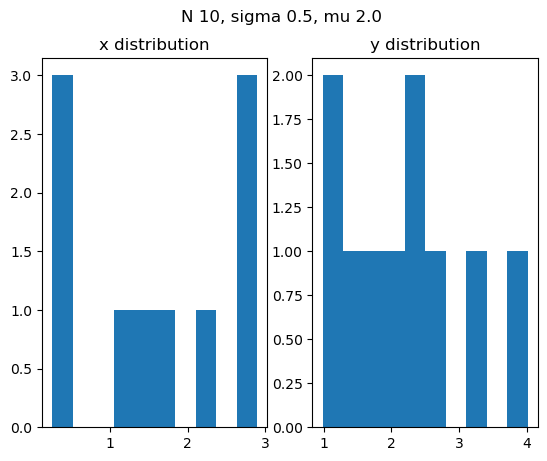

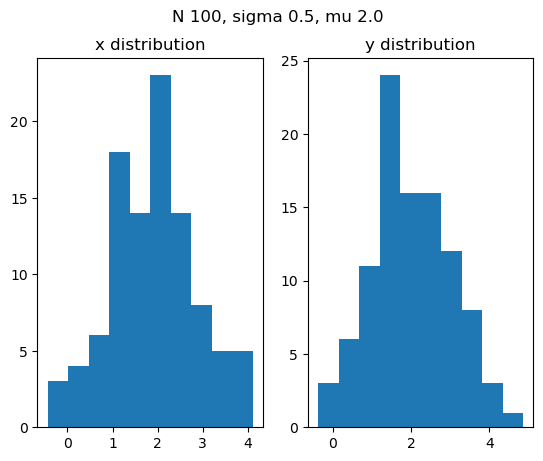

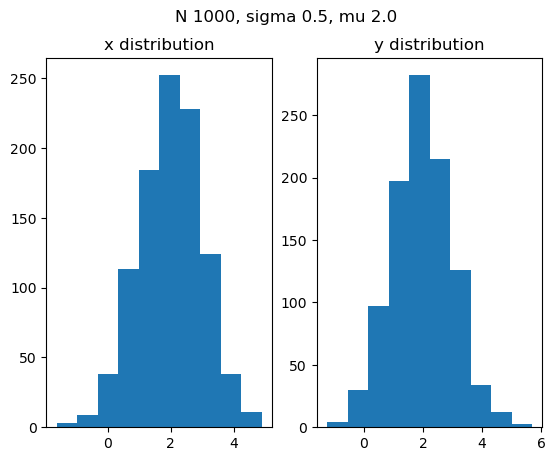

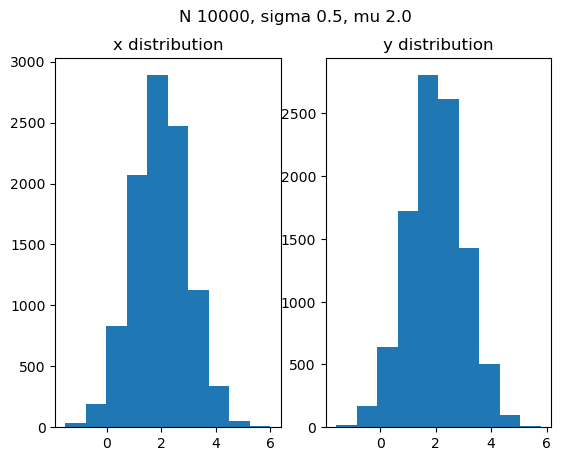

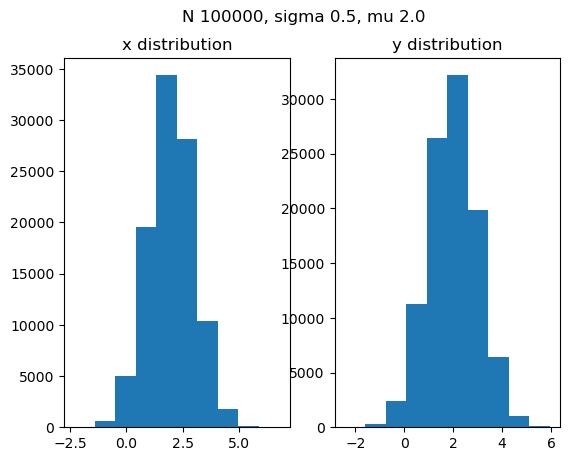

'--------------------Write your code above this line------------------------------'

In [22]:
'''--------------------Write your code below this line------------------------------'''

# I found a good reference for this online at
# https://rh8liuqy.github.io/Box_Muller_Algorithm.html


# Need to generate two uniform random distributions, ud1 and ud2
# From these, can apply the transform and arrive at the
# Gaussian (normal) distributions we seek.

def box_mueller(mu, sigma, n):
    # Set up the numpy random number generator with a randomly-chosen seed
    np.random.seed(101)  # Using 101

    # Now create the distributions
    ud1 = np.random.uniform(size = n)
    ud2 = np.random.uniform(size = n)

    # Compute R, of exp(-R^2/2)
    R = np.sqrt(-2 * np.log(ud1))

    # And compute theta
    theta = 2 * np.pi * ud2

    # Make sure these are centered around mu, the desired mean
    # And have half-width sigma
    x = R * np.cos(theta / (sigma)) + mu
    y = R * np.sin(theta / (sigma)) + mu

    return x, y

my_sigma = 0.5
my_mu    = 2.0
for i in range(len(N_vals)):
    x, y = box_mueller(my_mu, my_sigma, N_vals[i])

    fig, h_axs = plt.subplots(1,2)
    h_axs[0].hist(x)
    h_axs[0].set_title("x distribution")
    h_axs[1].hist(y)
    h_axs[1].set_title("y distribution")
    fig.suptitle(f"N {N_vals[i]}, sigma {my_sigma}, mu {my_mu}")
    plt.show()

'''--------------------Write your code above this line------------------------------'''

## E) 
Do a simple Monte Carlo simulation, this time using different Gaussian-distributed samples as mentioned above, 
$$     \int_a^b f(x) dx =\lim_{N\to \infty} \frac{b-a}{N} \sum_{i=0}^N f(x_i), \hspace{0.2cm} X \sim N(\mu,\sigma) $$
and we set $2a=c=1$. Let's first assume $\mu=0$ and $\sigma=1$. For each sampling size, N=[10,100,1000,10000,100000], calculate the error, and plot them. 


Next, test various $\mu$ and $\sigma$ with a fixed $N=10000$, calculate the error, and plot them. 
How is it different from C)? 





Calculating true area.
True area: 3.3469733915391022
True area calculated: 3.3469733915391022
M_C_approx_vals ({len(N_vals)} values):


array([6.23537091, 6.24846886, 6.24805818, 6.25070685, 6.25161695])


M_C_err_vals ({len(N_vals)} values):


array([2.88839752, 2.90149547, 2.90108479, 2.90373346, 2.90464356])

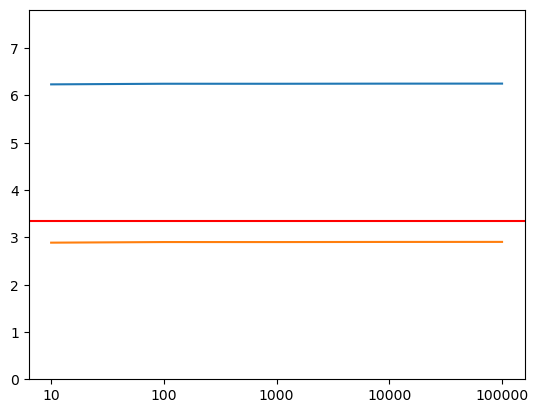

'--------------------Write your code above this line------------------------------'

In [11]:
'''--------------------Write your code below this line------------------------------'''

# Integral approximation again, this time using random normally-distributed
# input values (X ~ N(mu, sigma)), instead of the random uniformly-distributed input values.

# Start with mu = 0, sigma = 1 and use the N_vals list as before
# Use my normal-distribution maker OR numpy's numpy.random.normal(mu, signa, N).
# Let's use numpy...

def calc_Monte_Carlo_npnormal(func, a_limit, b_limit, mu, sigma, N):
    width = b_limit - a_limit
    coeff = width/N

    np.random.seed(101)  # Using 101

    
    # Create an array of N random values between a_limit and b_limit.
    # numpy's normal(mu, sigma, N) returns N values centered on mu with standard deviaion signma.
    
    # Then run the func() on each of these random x values and sum the results.
    # Finally, multiply by coeff and return the approximation.
    
    n_rand_array    = np.random.normal(mu, sigma, N)

    f_results       = func(n_rand_array)
    f_sum           = np.sum(f_results)
    approx_integral = coeff * f_sum

    return approx_integral



# To find the surface area of the ellipsoid, need to integrate from z = -c to +c or
# integrate from x = 0 to z = +c and double it.

# Run this computation for different values of N.  The 'true' value
# of the integral is found in the limit N->infinity.  Grab the error for each N
# to plot to see if the calculation converges.


# NOTE: my_sigma = 1.0 allows the z-range to be too big.  Since my_c = 1.0,
# any z value greater than 1.0 in abs value will cause an error.  So I'll use 0.1 instead.

my_sigma = 0.1
my_mu    = 0.0
my_beta  = 0.5
my_c     = 1.0
my_a     = 0.5

M_C_approx_vals = np.zeros(len(N_vals))
M_C_err_vals    = np.zeros(len(N_vals))

print("Calculating true area.")
true_S_A_value  = true_area(my_beta, my_c, 1.0)
print(f"True area: {true_S_A_value}")

for i in range(len(N_vals)):
    M_C_approx_vals[i] = calc_Monte_Carlo_npnormal(lambda z: ellipsoid_strip(z, my_beta, my_c), 0, my_c, my_mu, my_sigma, N_vals[i])
    M_C_err_vals[i]    = M_C_approx_vals[i] - true_S_A_value

print(f"True area calculated: {true_S_A_value}")
print("M_C_approx_vals ({len(N_vals)} values):")
display(M_C_approx_vals)
print()

print("M_C_err_vals ({len(N_vals)} values):")
display(M_C_err_vals)
print("\n\n\n\n")

top_end = np.max(M_C_approx_vals)
top_end = np.max([top_end, true_S_A_value])

top_end = 1.25*top_end  # Add a little headroom

plt.plot(M_C_approx_vals)
plt.plot(M_C_err_vals)
plt.ylim((0, top_end))
plt.axhline(true_S_A_value, linestyle="-", color='r')
plt.xticks(ticks=tick_array, labels=N_vals)
plt.show()

'''--------------------Write your code above this line------------------------------'''

 <div style="text-align: center;">
    <h2><strong>Rejection Sampling </strong></h2>
</div>

Rejection sampling is used to generate data points that follow a particular complicated distribution. Let's say that the probability of observing a particle decay event at time t follows the probability density function (PDF),

$$p(x)=e^{-bt}cos^2(at), \hspace{0.2cm} t \geq 0$$. 

See below for an example when $a=4b=4$ (If you are interested, you can refer to the lecture notes on the Lorentzian function for energy dissipation). 

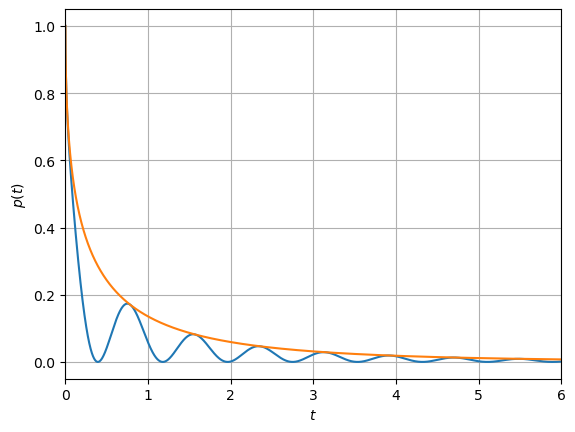

In [12]:
# Example
t = np.linspace(0, 6, 100000)
y = np.exp(-2*np.sqrt(t))*np.cos(4*t)**2
y2 = np.exp(-2*np.sqrt(t)) 
plt.plot(t, y)
plt.plot(t, y2)
plt.grid(True)
plt.xlim(0, 6)
plt.xlabel('$t$')
plt.ylabel('$p(t)$') 
plt.show()

## A) 
Write a rejection sampling function by using a **uniform proposal function**, 
$$f(t) \sim U(0,t_f)$$
to sample the PDF discussed above, with  $a=4b=4$. 

It should return a N sample numpy array. How do you select the $t_f$? Plot the resulting sample histogram with N=[100,1000,10000]. 



In [13]:
'''--------------------Write your code below this line------------------------------'''


'''--------------------Write your code above this line------------------------------'''

'--------------------Write your code above this line------------------------------'

## B) 
Write a rejection sampling function by using a **exponential proposal function**, 
$$f(t) \sim Exp(1)=e^{-2t}$$
to sample the PDF discussed above, with the same $a=4b=4$. 

It should return a N sample numpy array. Plot the resulting sample histogram with N=[100,1000,10000]. Make a comparison between the uniform proposal function and exponential proposal function at various sample sizes. 


In [14]:
'''--------------------Write your code below this line------------------------------'''


'''--------------------Write your code above this line------------------------------'''

'--------------------Write your code above this line------------------------------'

<div style="text-align: center;">
    <h2><strong> Optimization </strong></h2>
</div>
 
<div style="text-align: center;">
    <h3><strong>   Gradient descent, Metropolis–Hastings algorithm, Simulated Annealing </strong></h3>
</div>
 

Gradient descent is a deterministic method for optimization. It requires the function to be differentiable and
convex.  The general formula for gradient descent is as follows:

Let $H(\theta)$ be the cost or loss function, where $\theta$ represents the model parameters. The goal is to find the optimal $\theta$ that minimizes $H(\theta)$.



The process of gradient descent involves starting with an initial guess for $\theta_i$, then iteratively applying the update rule until convergence. Convergence is typically determined by monitoring the change in the cost function or the norm of the gradient.


The update rule for gradient descent is as follows:

$$\theta_{i+1} = \theta_{i} - \alpha_i \cdot \nabla H(\theta_{i})$$

where $\alpha_i$ The learning rate, which is a hyperparameter that determines the step size of each update. The choice of the learning rate ($\alpha$) is crucial in gradient descent, as it can affect the algorithm's convergence and stability. It often requires experimentation to find an appropriate learning rate for a specific problem. The gradient ($\nabla H$) is a vector that contains the partial derivatives of the cost function with respect to each parameter in $\theta$. It represents the rate of change of the cost function with respect to each parameter and guides the updates.



<div style="text-align: center;">
    <h3><strong> $\phi4$ theory in 1D </strong></h3>
</div>

Let's say you have a noisy $\phi4$ theory in 1D, given by,

$$H=\theta^4-8\theta^2-2cos(4\pi \theta),$$

where $\theta$ is an order parameter. You want to find the ground state order parameter and energy (see the figure below). 

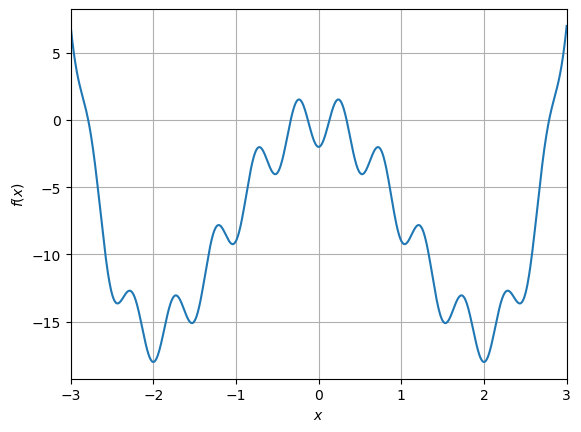

In [15]:
x = np.linspace(-3, 3, 1000)
y = x**4-8*x**2 - 2*np.cos(4*np.pi*(x))
plt.plot(x, y)
plt.grid(True)
plt.xlim(-3, 3)
plt.xlabel('$x$')
plt.ylabel('$f(x)$') 
plt.show()

## A) 
Using the gradient descent method, locate the global minimum starting with three initial guesses $\theta_0=-1,0.5,3$. For each descent step, plot a **red dot** on the above plot and save it locally until it converges. Make a **video** by processing your saved figures (you may want to look into "cv2.VideoWriter"). You should tune the learning parameter at each step! 

Do you get consistent results? 

In [16]:


'''--------------------Write your code below this line------------------------------'''


'''--------------------Write your code above this line------------------------------'''

'--------------------Write your code above this line------------------------------'

<div style="text-align: center;">
    <h3><strong> Elementary Hamiltonian Monte Carlo: Metropolis–Hastings algorithm </strong></h3>
</div>

As we discussed in class, Metropolis–Hastings algorithm is a Monte Carlo method that is used for optimization. In here, we will look at some basics. In Bayesian inference, the posterior can be expressed as Boltzmann factors, 

$$ P(\theta)=\frac{e^{-\beta H(\theta)}}{Z},$$

where $H$ is Hamiltonian, $\beta=1/kT$, and Z is the partition function. Let's start with an initial parameter guess $\theta_0$. Let's randomly move from $\theta_1 \to \theta_0+\Delta\theta$, where the step follows a Gaussian $\Delta \theta \sim \mathcal{N}(0,\sigma)$ (Markov process). Note, it must be symmetric. Then, the ratio,

$$   r=\frac{e^{-\beta H(\theta^*)}}{e^{-\beta H(\theta)}}=e^{-\beta H(\theta^*)+\beta H(\theta)}=e^{-\beta \Delta H(\theta^*,\theta)}.$$

If $r >1$, we accept it and set $\theta_1 \to \theta_0$. On the other hand, $r<1$, we accept it with probability $r$ and set $\theta_1 \to \theta_0$. If rejected, keep $\theta_0=\theta_0$. This is an elementary demonstration of the Hamiltonian Monte Carlo (no auxiliary momentum and kinetic energy). 


## B)
Use the Metropolis–Hastings algorithm above to estimate the minimum of the noisy $\phi4$ with initial guesses $\theta_0=-1,0.5,3$. You should try different $\beta$. 

In [17]:


'''--------------------Write your code below this line------------------------------'''


'''--------------------Write your code above this line------------------------------'''

'--------------------Write your code above this line------------------------------'

<div style="text-align: center;">
    <h3><strong>  Simulated Annealing  </strong></h3>
</div>
Simulated Annealing is a probabilistic optimization algorithm inspired by the annealing process in metal. The cooling schedule is usually defined as the following,

$$ \beta_{i+1} = \beta_{i} +\delta_i,$$

where we update the inverse temperature each step. This update will change the Metropolis criterion, 

$$r_i=e^{-\beta_i \Delta H(\theta^*,\theta)}> u_i $$

where $u_i \sim U(0,1)$. The cooling schedule is a critical aspect of Simulated Annealing. It determines the rate at which the temperature decreases. 



## C)
Add a cooling schedule to the Metropolis–Hastings algorithm above. Then, estimate the minimum of the noisy $\phi4$ with initial guesses $\theta_0=-1,0.5,3$. You should try different cooling schedule e.g. $\delta_i$. Make a graphical comparison of the convergence steps with cooling and without cooling. 

In [18]:


'''--------------------Write your code below this line------------------------------'''


'''--------------------Write your code above this line------------------------------'''

'--------------------Write your code above this line------------------------------'